# Clustering Data with k-Means

*k-means* clustering is an unsupervised learning method. Despite being considered a relatively basic clustering technique it can work really well in specific scenarios and quite simple to understand.

## Generating blobs
We'll start off by making a dummy dataset, which we can use to perform $k$-means clustering later on. The `make_blobs` function creates [Gaussian](https://en.wikipedia.org/wiki/Gaussian_function) data based on the `n_samples` and `n_features` parameters. We also can set the center of these Gaussian blobs.

In [1]:
from sklearn.datasets import make_blobs
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or array-like of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_sampl

## Sample dataset
Generate a dummy dataset using `make_blobs(...)`. It is always useful to see the shape of the generated dummy data.

In [2]:
data, labels = make_blobs(n_samples=200, n_features=2, centers=5)
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

Data shape: (200, 2)
Labels shape: (200,)


In [3]:
labels

array([3, 0, 4, 2, 1, 4, 1, 4, 1, 0, 1, 3, 2, 0, 0, 1, 3, 0, 0, 2, 4, 4,
       1, 0, 2, 2, 1, 2, 2, 1, 3, 1, 3, 1, 2, 0, 4, 1, 0, 3, 3, 0, 2, 0,
       4, 1, 2, 1, 1, 0, 2, 4, 2, 2, 4, 2, 0, 4, 1, 4, 4, 4, 2, 3, 2, 3,
       1, 3, 3, 0, 0, 2, 0, 3, 3, 0, 1, 4, 4, 1, 3, 4, 2, 3, 1, 1, 3, 3,
       3, 1, 1, 3, 2, 3, 3, 3, 0, 0, 1, 2, 2, 2, 0, 1, 4, 2, 4, 1, 4, 0,
       4, 4, 4, 4, 4, 4, 2, 3, 4, 3, 0, 4, 4, 3, 1, 2, 4, 0, 2, 3, 4, 0,
       1, 4, 1, 4, 4, 3, 0, 0, 1, 2, 1, 3, 0, 4, 1, 3, 2, 4, 1, 0, 2, 3,
       0, 3, 1, 2, 3, 0, 1, 0, 2, 4, 0, 1, 4, 2, 0, 2, 3, 3, 0, 0, 2, 0,
       3, 2, 3, 1, 3, 3, 1, 1, 1, 4, 3, 2, 4, 2, 0, 2, 1, 3, 2, 0, 4, 0,
       2, 0])

The output shows that the data comprises of 200 points, each with 2D data (an $x$ and a $y$ coordinate). The labels are just 1D, with each sample having a related label.

## Visualising 2D data
Since our data is 2D, we will extract all the $x$ coordinates and all the $y$ coordinates separately (which is how [Matplotlib](https://matplotlib.org) needs the data before plotting). To do so, we use indexed array using the `[:,0]` index, which means take all elements in the `0`-th position, i.e. all the $x$ coordinates.

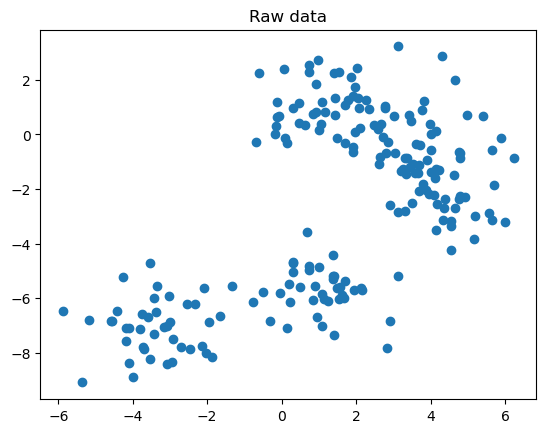

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1]) # 0-th position = x coords; 1-th position = y coords
plt.title("Raw data")
plt.show()

It is fairly to see the clusters here. Clusters are simple to imagine as small collections of data that have some commonalities. In the plot above, samples near to each other are more related than those further away.

## Boolean indexing
To better visualise the cluster, we can plot each cluster using different colour for different clusters. In order to do that we can use *boolean indexing* where the raw data is indexed by its label. The boolean (`True`/`False` values) can be obtained using the `[labels==label]` indexing method. For example: 

In [5]:
import numpy as np

sample = np.array(['A', 'B', 'C'])
boolean_comp = np.array([0,0,0])==np.array([1,0,1])

print(f"Data: {sample}")
print(f"Filter: {boolean_comp}")
print(f"Filtered data: {sample[boolean_comp]}")

Data: ['A' 'B' 'C']
Filter: [False  True False]
Filtered data: ['B']


## Visualising clusters
Back to our dummy clusters, we can apply boolean indexing to a simple loop, where we iterate over each label, filter the data by this label, and plot them. This is the *general approach* for plotting scatter plots in Matplotlib, where there are clusters of points that should be displayed in different ways.

In [6]:
labels

array([3, 0, 4, 2, 1, 4, 1, 4, 1, 0, 1, 3, 2, 0, 0, 1, 3, 0, 0, 2, 4, 4,
       1, 0, 2, 2, 1, 2, 2, 1, 3, 1, 3, 1, 2, 0, 4, 1, 0, 3, 3, 0, 2, 0,
       4, 1, 2, 1, 1, 0, 2, 4, 2, 2, 4, 2, 0, 4, 1, 4, 4, 4, 2, 3, 2, 3,
       1, 3, 3, 0, 0, 2, 0, 3, 3, 0, 1, 4, 4, 1, 3, 4, 2, 3, 1, 1, 3, 3,
       3, 1, 1, 3, 2, 3, 3, 3, 0, 0, 1, 2, 2, 2, 0, 1, 4, 2, 4, 1, 4, 0,
       4, 4, 4, 4, 4, 4, 2, 3, 4, 3, 0, 4, 4, 3, 1, 2, 4, 0, 2, 3, 4, 0,
       1, 4, 1, 4, 4, 3, 0, 0, 1, 2, 1, 3, 0, 4, 1, 3, 2, 4, 1, 0, 2, 3,
       0, 3, 1, 2, 3, 0, 1, 0, 2, 4, 0, 1, 4, 2, 0, 2, 3, 3, 0, 0, 2, 0,
       3, 2, 3, 1, 3, 3, 1, 1, 1, 4, 3, 2, 4, 2, 0, 2, 1, 3, 2, 0, 4, 0,
       2, 0])

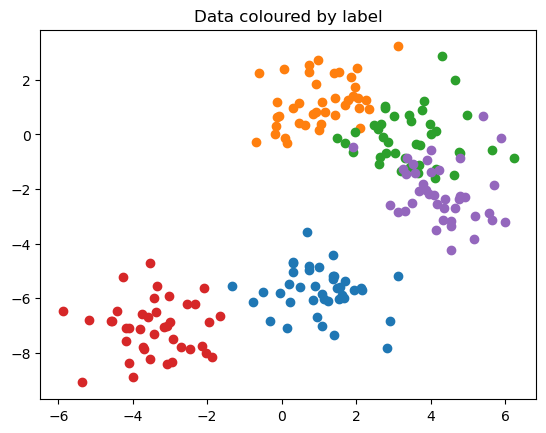

In [7]:
for label in np.unique(labels):
  data_filter = data[labels==label]
  plt.scatter(data_filter[:,0], data_filter[:,1])
  plt.title("Data coloured by label")

plt.show()

## Bigger dataset

Next we are going to explore how we can apply $k$-means clustering using [Scikit-learn](https://scikit-learn.org/stable/). Again, we will begin by creating a new, bigger dataset comprising 800 2D points, belonging to 10 different clusters. It's always a good idea to visualise your data whenever possible: here we plot the raw data **without** labels, alongside the data coloured by cluster.

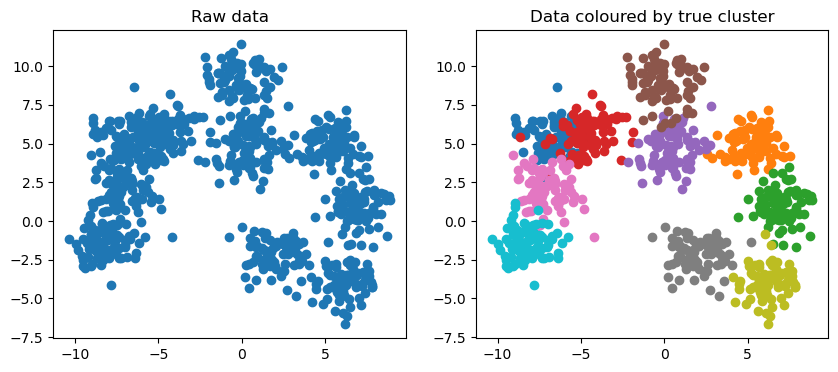

In [8]:
# Generate samples
data, _ = make_blobs(n_samples=800, n_features=2, centers=10)

# Plot samples
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(data[:,0], data[:,1])
axes[0].set_title("Raw data")

for label in np.unique(_):
  data_filter = data[_==label]
  axes[1].scatter(data_filter[:,0], data_filter[:,1])
  axes[1].set_title("Data coloured by true cluster")

plt.show()


## $k$-means clustering in Scikit-learn

$k$-means is a method for taking raw data, like the blue dots above, and **finding a way to learn cluster membership for individual points**. 

We create a `clusterer` object, which has a number of possible parameters we can set. On the basic form, we will use `random` initialisation, and assume that we have 6 (or any arbitrary numbers) clusters: this is the $k$ in $k$-means. Once we have this object, we can simply `fit_predict` the results, which will use our data and return the labels which $k$-means finds based on the parameters we choose.

In [9]:
from sklearn.cluster import KMeans
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho

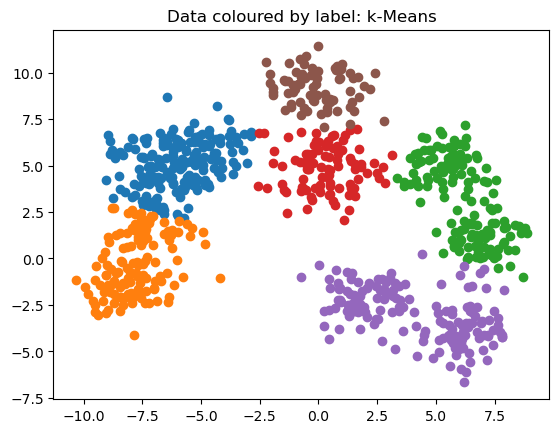

In [11]:
clusterer = KMeans(n_clusters=6, init="random", n_init=10)
res_kmean = clusterer.fit_predict(data)

for label in np.unique(res_kmean):
  data_filter = data[res_kmean==label]
  plt.scatter(data_filter[:,0], data_filter[:,1])
  plt.title("Data coloured by label: k-Means")

plt.show()

## How $k$-means works?

$k$-means clustering is an iterative algorithm. This means it follows very specific steps in a loop, until the user stops it, or if its results stop changing (i.e. it has reached a form of convergence). 

The first step $k$-means does is choose a random initialisation for the centers of our $k$ clusters. We can do this manually using NumPy `np.random.normal` as follows:

In [12]:
?np.random.normal

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

In [13]:
random_centroids = np.random.normal(loc=0, scale=5, size=(3,2))
print(random_centroids)

[[-2.50575806  4.05250855]
 [ 0.90612681 -5.29025878]
 [ 7.43533439 -4.43713563]]


The above code called these centroids. A centroid is simply a mean value of a collection of points. We just chose 3 random middle points. Using this, $k$-means assigns each sample in your raw data to its nearest center. Once it has done this, it recalculates new centers based on these new clusters. More formally, each algorithm iteration involves two steps:

* **Step 1**: Update centroids to centers of clusters (or initialize with random values for the first iteration). 
* **Step 2**: Assign each sample to its nearest centroid. 

We then repeat these two steps over and over again, until the algorithm converges — or, in other words, until results stop changing.

## Visualising algorithm iterations
Let's visualise the first 3 iterations of a $k$-means algorithm. The code may seem complicated, but all we are doing is allowing $k$-means to only work one iteration at a time, this is controlled by setting both `n_init` and `max_iter` to 1. Secondly, we set `init` to our previous iteration centroids — in the case of the first iteration, it is set to the random initial centroids. We will use the steps mentioned previously.

Let's take first 3 iterations and plot our centroids and clusters for every iteration and each iteration step. We will also enable plot grids, so that it's easier to follow how centroids migrate across iterations.

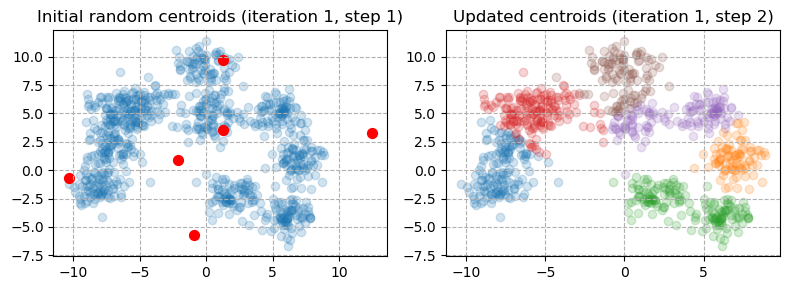

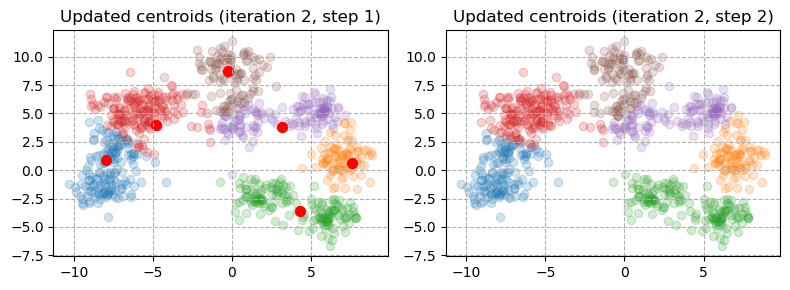

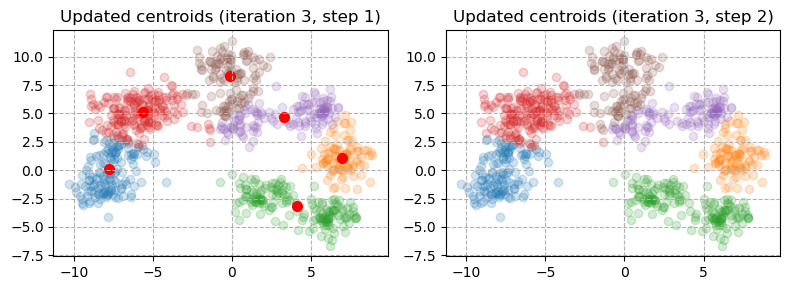

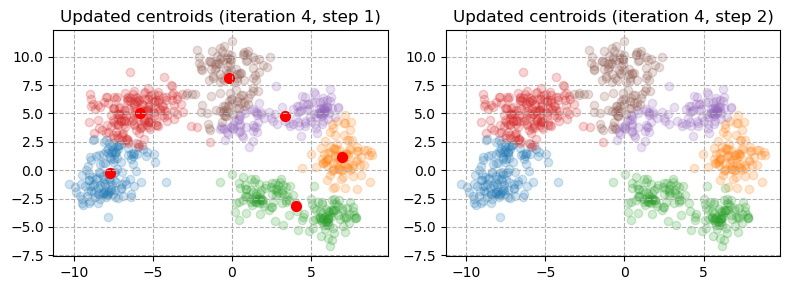

In [14]:
num_iterations = 4
previous_labels = None

centroids = np.random.normal(loc=0, scale=5, size=(6,2))

for i in range(num_iterations):
  fig, axes = plt.subplots(1,2, figsize=(8,3))
  clusterer = KMeans(n_clusters=6, init=centroids, n_init=1, max_iter=1)
  res_kmean = clusterer.fit_predict(data)

  # Plot step 1 values of iteration i:
  if i==0:
    axes[0].scatter(data[:,0], data[:,1], alpha=0.2)
    axes[0].set_title("Initial random centroids (iteration 1, step 1)")
  else:
    for label in np.unique(previous_labels):
      data_filter = data[previous_labels==label]
      axes[0].scatter(data_filter[:,0], data_filter[:,1], alpha=0.2)
      axes[0].set_title(f"Updated centroids (iteration {i+1}, step 1)")
  axes[0].scatter(centroids[:,0], centroids[:,1], s=50, alpha=1, c="r")
  axes[0].grid(linestyle="--")

  # Plot step 2 values of iteration i:
  for label in np.unique(res_kmean):
    data_filter = data[res_kmean==label]
    axes[1].scatter(data_filter[:,0], data_filter[:,1], alpha=0.2)
    axes[1].set_title(f"Updated centroids (iteration {i+1}, step 2)")
  axes[1].grid(linestyle="--")

  previous_labels = res_kmean
  centroids = clusterer.cluster_centers_
  plt.tight_layout()
  plt.show()

## Real dataset
Now let's see how it performs in the real world. Geospatial data is always interesting to work with, because it very much describes the physical world around us. 

If you think of the world map, you could very well describe continents, countries, and then cities, as a clustering problem. Cities can be clustered to form countries, and countries clustered to become continents. 

### Exploratory visualisation
In the next example we will import a dataset included in the [GeoPandas](https://geopandas.org) module, called `naturalearth_cities`, which includes a collection of cities in the world. This module is useful because we can overlay these cities on a world map. 



In [15]:
# Install GeoPandas module.
%pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
  Using cached geopandas-0.13.2-py3-none-any.whl.metadata (1.5 kB)
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/6e/40/b2830d90c80254dc6fefeb066bd4cbcd305a5058e79cf3fade5706184ea2/Fiona-1.9.4.post1-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.9 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.0.1 from https://files.pythonhosted.org/packages/1b/d7/df8483715560c7a4f060774171c5ef75360d73da6b7a1b7768037885a6b4/pyproj-3.6.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.1 MB/s eta 0:00:0000:01:00:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (

In [16]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))

print(f"World data shape: {world.shape}")
print(f"Cities data shape: {cities.shape}")

/var/folders/ql/p3kfkc9j0yg9y6hmz6mjxnr00000gn/T/ipykernel_3788/3466983719.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


World data shape: (177, 6)
Cities data shape: (243, 2)


/var/folders/ql/p3kfkc9j0yg9y6hmz6mjxnr00000gn/T/ipykernel_3788/3466983719.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))


Extract the top 5 rows of the Pandas `Dataframe`

In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


This shows that the world is a `DataFrame` that containes countries, and the `geometry` column is an object that GeoPandas uses to plot a country on a world map. Using this data we can then overlay the cities data on top of this, which similarly stores longitude and *latitude features of the cities in the world.

## Visualising data points
Let's visualise the data using the built-in GeoPandas functionality. We are going to get the colors dynamically from Matplotlib configuration.

<Axes: >

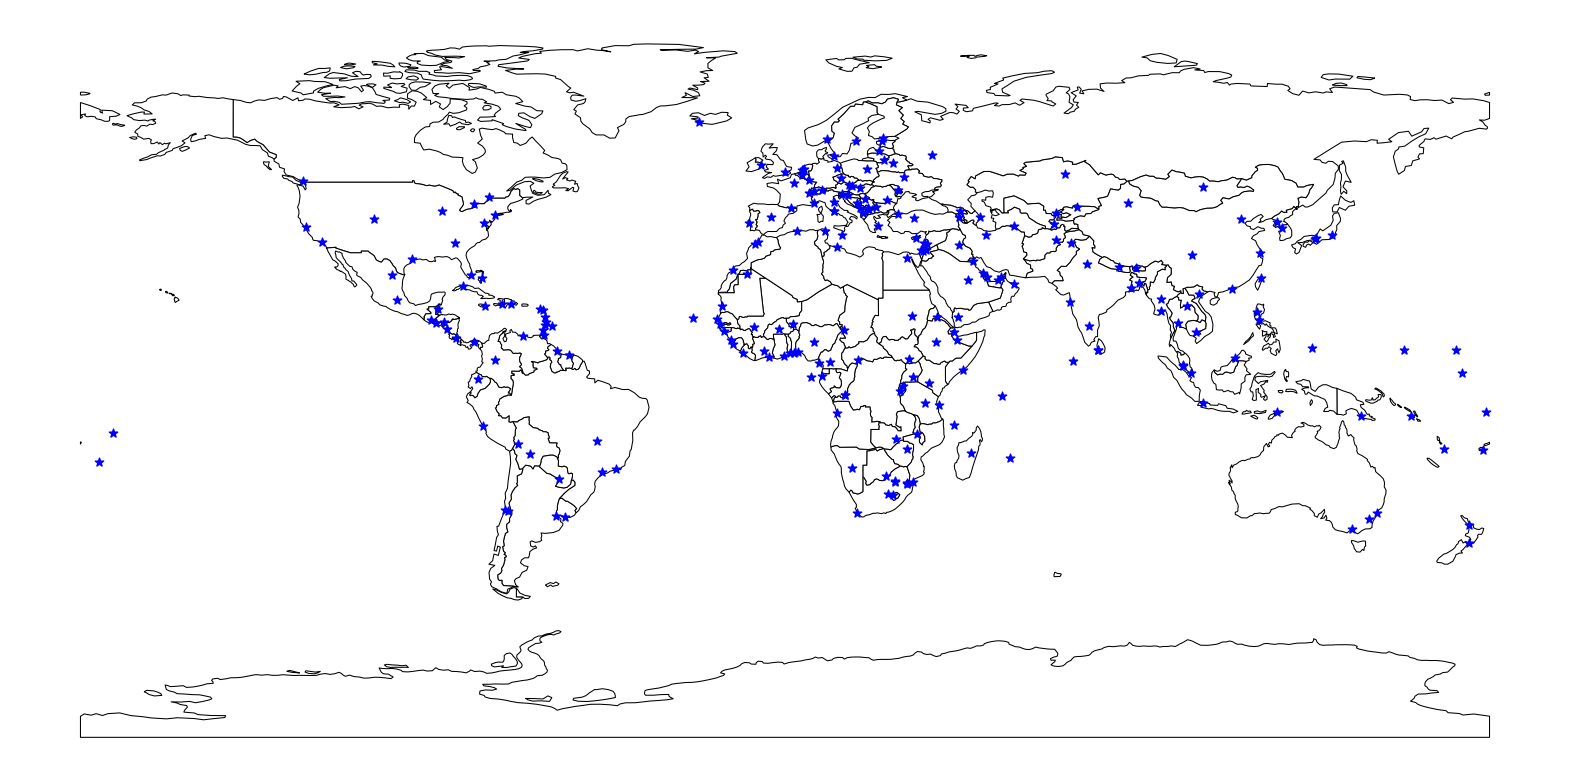

In [19]:
from matplotlib import lines

background_col = plt.rcParams["figure.facecolor"]
lines_col = plt.rcParams["text.color"]

_,ax = plt.subplots(1, figsize=(20,10))
base = world.plot(color=background_col, edgecolor=lines_col, linewidth=0.75, ax=ax)

# switch both x and y axes
ax.set_axis_off()

cities.plot(ax=base, marker="*", c="blue", markersize=40)

## Processing data
We want to extract the longitude and latitude coordinates from this data. To do so we use the `cities.geometry.x` and `cities.geometry.y` respectively. We want this specific data so that we can feed it into $k$-means as a NumPy array. Let's create new feature columns with this data.

In [20]:
cities["longtitude"] = cities.geometry.x
cities["latitude"] = cities.geometry.y
cities.head()

,name,geometry,longtitude,latitude
0,Vatican City,POINT (12.45339 41.90328),12.453387,41.903282
1,San Marino,POINT (12.44177 43.93610),12.441770,43.936096
2,Vaduz,POINT (9.51667 47.13372),9.516670,47.133724
3,Lobamba,POINT (31.20000 -26.46667),31.199997,-26.466667
4,Luxembourg,POINT (6.13000 49.61166),6.130003,49.611660


and create a NumPy array which required for $k$-means.

In [21]:
data = cities[["longtitude", "latitude"]].to_numpy()
print(f"Data shape: {data.shape}")

Data shape: (243, 2)


## Training a model
We can start with the modeling. Here is where you can get creative, and find different $k$ values to improve our results. As before, let's fit a model and assign our results onto a new column.

In [32]:
clusterer = KMeans(n_clusters=10, n_init=10)
res_kmean = clusterer.fit_predict(data)
cities["cluster"] = res_kmean
cities.head()

,name,geometry,longtitude,latitude,cluster
0,Vatican City,POINT (12.45339 41.90328),12.453387,41.903282,6
1,San Marino,POINT (12.44177 43.93610),12.441770,43.936096,6
2,Vaduz,POINT (9.51667 47.13372),9.516670,47.133724,6
3,Lobamba,POINT (31.20000 -26.46667),31.199997,-26.466667,8
4,Luxembourg,POINT (6.13000 49.61166),6.130003,49.611660,6


In [33]:
cities.tail()

,name,geometry,longtitude,latitude,cluster
238,Rio de Janeiro,POINT (-43.21212 -22.90731),-43.212117,-22.907308,0
239,São Paulo,POINT (-46.62697 -23.55673),-46.626966,-23.556734,0
240,Sydney,POINT (151.21255 -33.87137),151.212548,-33.871373,3
241,Singapore,POINT (103.85387 1.29498),103.853875,1.294979,5
242,Hong Kong,POINT (114.18306 22.30693),114.183064,22.306927,5


### Helper functions

We can define some useful helper functions that will assist us in the next plots. This is a useful little routine for whenever you have to plot a lot of different items with a limited color space. Matplotlib lets you select from a large list of markers, as well as colours as we've already seen. 

We use the `itertools`'s `cycle` to iterate over a number of colours, and a number of markers. They have different lengths, such that it will take a few iterations before we would get the same combination of color and marker.

In [34]:
from itertools import cycle

cols = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
cols = cycle(cols)
markers = [",","o","v","^","<",">","p","P","*","h","H"]
markers = cycle(markers)

In [30]:
print(next(cols))
print(next(markers))
print(next(markers))
print(next(markers))
print(next(cols))

#8dd3c7
,
o
v
#ffffb3


## Visualising results

Now, let's plot our cities, clustered using our $k$-means model. We extract the relevant cluster each iteration in the loop, and we get the next marker and color as explained on the previous page. 

We retrieve some colors dynamically from Matplotlib settings (e.g. plot's background color and lines color), so that they match your device's UI theme; markersize is the size of the point being plot; edgecolors is the color of the outline of the plot. 

I also set the title, disable plot axis and provide a legend so that our final plot looks more complete.

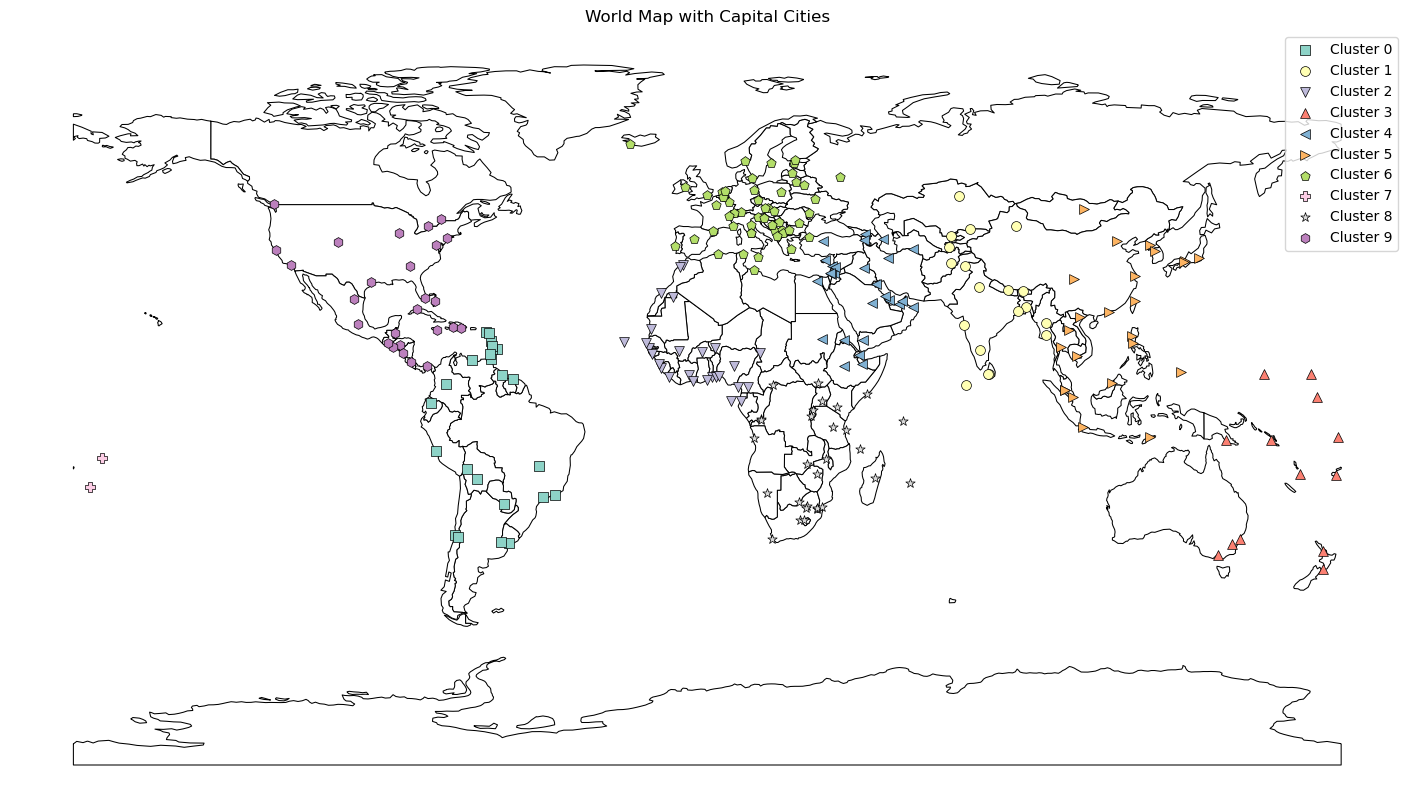

In [35]:
background_color = plt.rcParams['figure.facecolor']
lines_color = plt.rcParams['text.color']

_, ax = plt.subplots(1, figsize=(22, 10))
base = world.plot(color=background_color, edgecolor=lines_color, linewidth=0.75, ax=ax)

ax.set_axis_off()

for label in np.unique(res_kmean):
    cities_filter = cities[cities.cluster==label]
    cities_filter.plot(ax=base, marker=next(markers), c=next(cols), markersize=50, label=f'Cluster {label}', edgecolors=lines_color, linewidth=0.5)

plt.title('World Map with Capital Cities')
plt.legend()
plt.show()


From this plot, we can see that $k$-means does a decent job of clustering our data based on regions of the map. Specifically, Europe is really well represented. Africa is sort of split across two dense regions, with some overlap from the Middle East and Europe. Central US is well-represented, as is South America.